## Back Test Results Binary Classification

In [1]:
import pandas as pd
from datetime import datetime, timezone
from pycaret.datasets import get_data
from pycaret.classification import *
import yaml
import time
import warnings
warnings.filterwarnings('ignore')

In [2]:
with open ('back_test_pipeline_settings.yaml') as ymlfile:
    cfg = yaml.safe_load(ymlfile)
    pair = cfg['currency']['pair']
    frac = cfg['model']['frac']
    random_state = cfg['model']['random_state']

In [3]:
print('Pair:', pair)
print('Fraction:', frac)
print('Random State:', random_state)

Pair: EURUSD
Fraction: 0.7
Random State: 850


In [4]:
now = datetime.now()
today = now.strftime("%d-%m-%Y_%I-%M_%p")

In [5]:
dataset = pd.read_csv('01_Back_Test_Data.csv')
dataset.shape

(50, 23)

In [6]:
dataset.describe()

,Candle_No,Current_Market_Fit,Current_Market,Rec1_Close_Score,Rec1_High_Score,Rec1_Low_Score,Rec1_HH,Rec1_LL,Rec2_Close_Score,Rec2_High_Score,Rec2_Low_Score,Rec2_HH,Rec2_LL,Rec3_Close_Score,Rec3_High_Score,Rec3_Low_Score,Rec3_HH,Rec3_LL,Rec4_Close_Score,Rec4_High_Score,Rec4_Low_Score,Rec4_HH,Rec4_LL
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,5283.120000,48.624750,0.460000,1.847186,-5.890388,5.216154,-0.005000,0.004246,1.847186,-5.890388,5.216154,-0.005384,0.00480,1.847186,-5.890388,5.216154,-0.004348,0.004588,1.847186,-5.890388,5.216154,-0.004834,0.004380
std,2617.905836,31.709756,0.503457,50.266568,51.932363,48.321690,0.004649,0.004280,50.266568,51.932363,48.321690,0.004101,0.00392,50.266568,51.932363,48.321690,0.003719,0.003585,50.266568,51.932363,48.321690,0.003876,0.002753
min,151.000000,0.182258,0.000000,-83.554097,-93.845323,-84.690655,-0.025000,0.000400,-83.554097,-93.845323,-84.690655,-0.017300,0.00030,-83.554097,-93.845323,-84.690655,-0.018100,0.000700,-83.554097,-93.845323,-84.690655,-0.018700,0.000400
25%,3327.750000,22.378331,0.000000,-36.109010,-47.783495,-27.702904,-0.006000,0.001900,-36.109010,-47.783495,-27.702904,-0.007725,0.00210,-36.109010,-47.783495,-27.702904,-0.006175,0.002175,-36.109010,-47.783495,-27.702904,-0.005875,0.002600
50%,4671.500000,61.490101,0.000000,0.297878,-0.992821,9.599059,-0.003800,0.003400,0.297878,-0.992821,9.599059,-0.004500,0.00355,0.297878,-0.992821,9.599059,-0.003000,0.004100,0.297878,-0.992821,9.599059,-0.004300,0.004050
75%,7727.500000,75.576978,1.000000,37.742203,41.492813,45.645015,-0.002425,0.004850,37.742203,41.492813,45.645015,-0.002600,0.00595,37.742203,41.492813,45.645015,-0.001625,0.005950,37.742203,41.492813,45.645015,-0.002100,0.005775
max,9499.000000,94.380920,1.000000,90.345856,89.896352,93.811979,-0.000800,0.028400,90.345856,89.896352,93.811979,-0.000300,0.01590,90.345856,89.896352,93.811979,-0.000300,0.019800,90.345856,89.896352,93.811979,-0.000400,0.015000


In [7]:
dataset['Rec1_Close_Score'] = dataset['Rec1_Close_Score'].round()
dataset['Rec1_High_Score'] = dataset['Rec1_High_Score'].round()
dataset['Rec1_Low_Score'] = dataset['Rec1_Low_Score'].round()

dataset['Rec2_Close_Score'] = dataset['Rec2_Close_Score'].round()
dataset['Rec2_High_Score'] = dataset['Rec2_High_Score'].round()
dataset['Rec2_Low_Score'] = dataset['Rec2_Low_Score'].round()

dataset['Rec3_Close_Score'] = dataset['Rec3_Close_Score'].round()
dataset['Rec3_High_Score'] = dataset['Rec3_High_Score'].round()
dataset['Rec3_Low_Score'] = dataset['Rec3_Low_Score'].round()

dataset['Rec4_Close_Score'] = dataset['Rec4_Close_Score'].round()
dataset['Rec4_High_Score'] = dataset['Rec4_High_Score'].round()
dataset['Rec4_Low_Score'] = dataset['Rec4_Low_Score'].round()

In [8]:
dataset.head(10)

,Candle_No,Current_Market_Fit,Current_Market,Rec1_Close_Score,Rec1_High_Score,Rec1_Low_Score,Rec1_HH,Rec1_LL,Rec2_Close_Score,Rec2_High_Score,Rec2_Low_Score,Rec2_HH,Rec2_LL,Rec3_Close_Score,Rec3_High_Score,Rec3_Low_Score,Rec3_HH,Rec3_LL,Rec4_Close_Score,Rec4_High_Score,Rec4_Low_Score,Rec4_HH,Rec4_LL
0,8870.0,80.719208,0.0,-37.0,-80.0,-32.0,-0.0009,0.0068,-37.0,-80.0,-32.0,-0.0022,0.0019,-37.0,-80.0,-32.0,-0.0012,0.0036,-37.0,-80.0,-32.0,-0.0047,0.0014
1,3250.0,64.866329,0.0,-77.0,-94.0,-76.0,-0.0025,0.0074,-77.0,-94.0,-76.0,-0.0032,0.0126,-77.0,-94.0,-76.0,-0.0062,0.0083,-77.0,-94.0,-76.0,-0.0082,0.0054
2,3336.0,12.713084,0.0,45.0,19.0,-27.0,-0.0056,0.0047,45.0,19.0,-27.0,-0.0031,0.0015,45.0,19.0,-27.0,-0.0088,0.0009,45.0,19.0,-27.0,-0.0032,0.0092
3,8112.0,1.616715,1.0,85.0,18.0,48.0,-0.0053,0.0007,85.0,18.0,48.0,-0.0031,0.0005,85.0,18.0,48.0,-0.0051,0.0019,85.0,18.0,48.0,-0.0048,0.0026
4,7080.0,72.131940,1.0,-1.0,0.0,-7.0,-0.0008,0.0035,-1.0,0.0,-7.0,-0.0030,0.0062,-1.0,0.0,-7.0,-0.0008,0.0026,-1.0,0.0,-7.0,-0.0008,0.0043
5,2863.0,76.376948,0.0,-73.0,-86.0,-72.0,-0.0010,0.0049,-73.0,-86.0,-72.0,-0.0014,0.0033,-73.0,-86.0,-72.0,-0.0023,0.0053,-73.0,-86.0,-72.0,-0.0045,0.0011
6,6575.0,28.167252,0.0,-12.0,-24.0,-57.0,-0.0075,0.0058,-12.0,-24.0,-57.0,-0.0072,0.0003,-12.0,-24.0,-57.0,-0.0055,0.0041,-12.0,-24.0,-57.0,-0.0055,0.0050
7,3243.0,10.657870,0.0,0.0,29.0,26.0,-0.0115,0.0046,0.0,29.0,26.0,-0.0007,0.0075,0.0,29.0,26.0,-0.0018,0.0043,0.0,29.0,26.0,-0.0047,0.0048
8,3612.0,94.380920,0.0,-8.0,-1.0,16.0,-0.0017,0.0042,-8.0,-1.0,16.0,-0.0083,0.0037,-8.0,-1.0,16.0,-0.0010,0.0066,-8.0,-1.0,16.0,-0.0028,0.0039
9,3325.0,30.900649,1.0,90.0,90.0,94.0,-0.0196,0.0004,90.0,90.0,94.0,-0.0017,0.0054,90.0,90.0,94.0,-0.0017,0.0060,90.0,90.0,94.0,-0.0187,0.0004


## Drop Predictions with Less than 15% LR Fit

In [9]:
dataset = dataset[dataset['Current_Market_Fit'] > 15]
dataset = dataset.reset_index()
del dataset['index']

In [10]:
dataset.shape

(39, 23)

In [11]:
dataset = dataset.drop([
    'Candle_No',
    'Current_Market_Fit',
#    'Rec1_Score',
#    'Rec2_Score',
#    'Rec3_Score',
#    'Rec4_Score',
], axis=1)

In [12]:
dataset.head()

,Current_Market,Rec1_Close_Score,Rec1_High_Score,Rec1_Low_Score,Rec1_HH,Rec1_LL,Rec2_Close_Score,Rec2_High_Score,Rec2_Low_Score,Rec2_HH,Rec2_LL,Rec3_Close_Score,Rec3_High_Score,Rec3_Low_Score,Rec3_HH,Rec3_LL,Rec4_Close_Score,Rec4_High_Score,Rec4_Low_Score,Rec4_HH,Rec4_LL
0,0.0,-37.0,-80.0,-32.0,-0.0009,0.0068,-37.0,-80.0,-32.0,-0.0022,0.0019,-37.0,-80.0,-32.0,-0.0012,0.0036,-37.0,-80.0,-32.0,-0.0047,0.0014
1,0.0,-77.0,-94.0,-76.0,-0.0025,0.0074,-77.0,-94.0,-76.0,-0.0032,0.0126,-77.0,-94.0,-76.0,-0.0062,0.0083,-77.0,-94.0,-76.0,-0.0082,0.0054
2,1.0,-1.0,0.0,-7.0,-0.0008,0.0035,-1.0,0.0,-7.0,-0.0030,0.0062,-1.0,0.0,-7.0,-0.0008,0.0026,-1.0,0.0,-7.0,-0.0008,0.0043
3,0.0,-73.0,-86.0,-72.0,-0.0010,0.0049,-73.0,-86.0,-72.0,-0.0014,0.0033,-73.0,-86.0,-72.0,-0.0023,0.0053,-73.0,-86.0,-72.0,-0.0045,0.0011
4,0.0,-12.0,-24.0,-57.0,-0.0075,0.0058,-12.0,-24.0,-57.0,-0.0072,0.0003,-12.0,-24.0,-57.0,-0.0055,0.0041,-12.0,-24.0,-57.0,-0.0055,0.0050


In [13]:
data = dataset.sample(frac=frac, random_state=random_state).reset_index(drop=True)
data_unseen = dataset.drop(data.index).reset_index(drop=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))
print('Fraction: ' + str(frac))
#print('Random State: ', str(random_state))

Data for Modeling: (27, 21)
Unseen Data For Predictions: (12, 21)
Fraction: 0.7


# Create Unseen DataFrame

In [14]:
data_unseen.shape

(12, 21)

In [15]:
data_unseen.head()

,Current_Market,Rec1_Close_Score,Rec1_High_Score,Rec1_Low_Score,Rec1_HH,Rec1_LL,Rec2_Close_Score,Rec2_High_Score,Rec2_Low_Score,Rec2_HH,Rec2_LL,Rec3_Close_Score,Rec3_High_Score,Rec3_Low_Score,Rec3_HH,Rec3_LL,Rec4_Close_Score,Rec4_High_Score,Rec4_Low_Score,Rec4_HH,Rec4_LL
0,0.0,83.0,74.0,81.0,-0.0250,0.0014,83.0,74.0,81.0,-0.0030,0.0017,83.0,74.0,81.0,-0.0021,0.0024,83.0,74.0,81.0,-0.0020,0.0022
1,1.0,18.0,63.0,11.0,-0.0047,0.0031,18.0,63.0,11.0,-0.0049,0.0009,18.0,63.0,11.0,-0.0025,0.0015,18.0,63.0,11.0,-0.0008,0.0091
2,1.0,-72.0,-61.0,-56.0,-0.0017,0.0059,-72.0,-61.0,-56.0,-0.0048,0.0019,-72.0,-61.0,-56.0,-0.0012,0.0035,-72.0,-61.0,-56.0,-0.0012,0.0058
3,1.0,-36.0,-56.0,-26.0,-0.0054,0.0022,-36.0,-56.0,-26.0,-0.0109,0.0021,-36.0,-56.0,-26.0,-0.0113,0.0007,-36.0,-56.0,-26.0,-0.0087,0.0026
4,0.0,-10.0,5.0,10.0,-0.0049,0.0038,-10.0,5.0,10.0,-0.0049,0.0113,-10.0,5.0,10.0,-0.0057,0.0050,-10.0,5.0,10.0,-0.0049,0.0039


In [16]:
exp_name = setup(data = data,
                 target = 'Current_Market',
#                 fold_shuffle=True,
                 session_id=123,
                 silent=True,
#                 n_jobs = 64,
#                 imputation_type='iterative'
                ) 

,Description,Value
0,session_id,123
1,Target,Current_Market
2,Target Type,Binary
3,Label Encoded,"0.0: 0, 1.0: 1"
4,Original Data,"(27, 21)"
5,Missing Values,0
6,Numeric Features,20
7,Categorical Features,0
8,Ordinal Features,0
9,High Cardinality Features,0


In [17]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
qda,Quadratic Discriminant Analysis,0.6000,0.5000,0.4000,0.4000,0.4000,nan,0.2000,0.0050
lightgbm,Light Gradient Boosting Machine,0.6000,0.4000,1.0000,0.6000,0.7333,nan,0.0000,0.0080
dummy,Dummy Classifier,0.6000,0.4000,1.0000,0.6000,0.7333,nan,0.0000,0.0030
knn,K Neighbors Classifier,0.4500,0.3500,0.5000,0.4500,0.4667,nan,-0.1000,0.1630
ada,Ada Boost Classifier,0.4500,0.2000,0.7000,0.4500,0.5333,nan,-0.1000,0.0130
lda,Linear Discriminant Analysis,0.4000,0.2000,0.5000,0.3000,0.3667,nan,-0.2000,0.0040
lr,Logistic Regression,0.3500,0.0000,0.7000,0.3500,0.4667,-0.1000,-0.1000,0.2520
svm,SVM - Linear Kernel,0.3500,0.0000,0.3000,0.2500,0.2667,-0.1000,-0.1000,0.0040
ridge,Ridge Classifier,0.3500,0.0000,0.7000,0.3500,0.4667,-0.1000,-0.1000,0.0030
gbc,Gradient Boosting Classifier,0.3500,0.4000,0.4000,0.2500,0.3000,-0.1000,-0.1000,0.0100


QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

In [22]:
with open ('back_test_pipeline_settings.yaml') as ymlfile:
    cfg = yaml.safe_load(ymlfile)
    model = cfg['model']['name']

In [23]:
print('Model Name:', model)

Model Name: lightgbm


In [24]:
MODEL = create_model(model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5000,0.5000,1.0000,0.5000,0.6667,0.0000,0.0000
1,0.5000,0.5000,1.0000,0.5000,0.6667,0.0000,0.0000
2,0.5000,0.5000,1.0000,0.5000,0.6667,0.0000,0.0000
3,0.5000,0.5000,1.0000,0.5000,0.6667,0.0000,0.0000
4,0.5000,0.5000,1.0000,0.5000,0.6667,0.0000,0.0000
5,0.5000,0.5000,1.0000,0.5000,0.6667,0.0000,0.0000
6,0.5000,0.5000,1.0000,0.5000,0.6667,0.0000,0.0000
7,0.5000,0.5000,1.0000,0.5000,0.6667,0.0000,0.0000
8,1.0000,0.0000,1.0000,1.0000,1.0000,nan,0.0000
9,1.0000,0.0000,1.0000,1.0000,1.0000,nan,0.0000


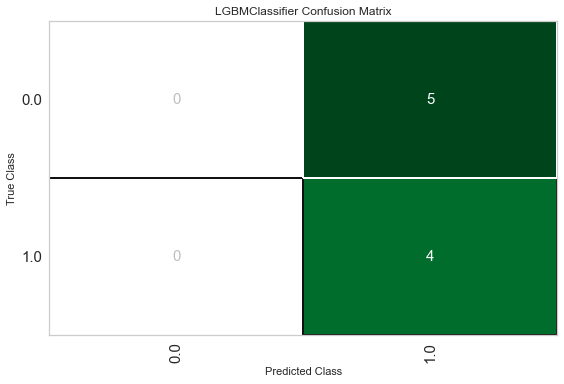

In [25]:
plot_model(MODEL, plot = 'confusion_matrix')

In [26]:
TUNED_MODEL = tune_model(MODEL)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5000,0.5000,1.0000,0.5000,0.6667,0.0000,0.0000
1,0.5000,0.5000,1.0000,0.5000,0.6667,0.0000,0.0000
2,0.5000,0.5000,1.0000,0.5000,0.6667,0.0000,0.0000
3,0.5000,0.5000,1.0000,0.5000,0.6667,0.0000,0.0000
4,0.5000,0.5000,1.0000,0.5000,0.6667,0.0000,0.0000
5,0.5000,0.5000,1.0000,0.5000,0.6667,0.0000,0.0000
6,0.5000,0.5000,1.0000,0.5000,0.6667,0.0000,0.0000
7,0.5000,0.5000,1.0000,0.5000,0.6667,0.0000,0.0000
8,1.0000,0.0000,1.0000,1.0000,1.0000,nan,0.0000
9,1.0000,0.0000,1.0000,1.0000,1.0000,nan,0.0000


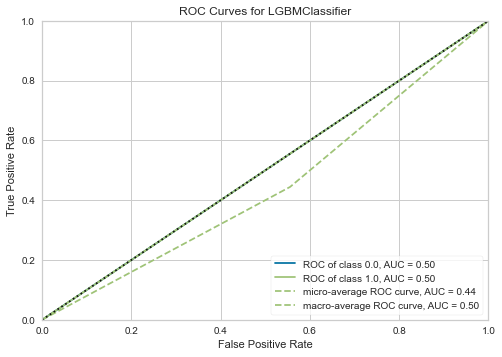

In [27]:
plot_model(TUNED_MODEL, plot = 'auc')

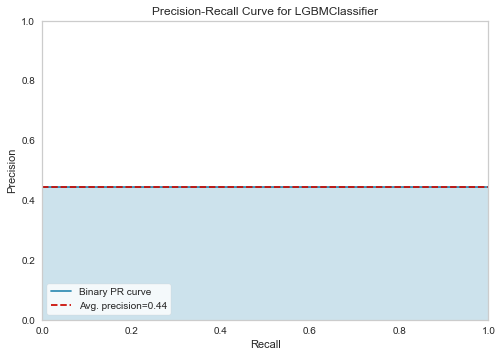

In [28]:
plot_model(TUNED_MODEL, plot = 'pr')

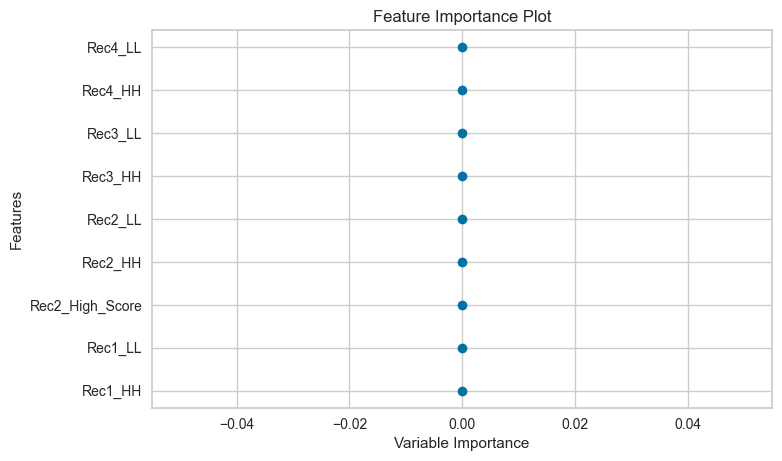

In [29]:
plot_model(TUNED_MODEL, plot='feature')

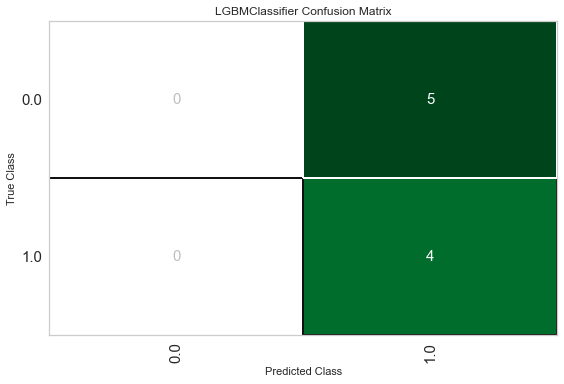

In [30]:
plot_model(TUNED_MODEL, plot = 'confusion_matrix')

In [31]:
predict_model(TUNED_MODEL);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.4444,0.5000,1.0000,0.4444,0.6154,0.0000,0.0000


In [32]:
FINAL_MODEL = finalize_model(TUNED_MODEL)

/Users/yekrangian/Data/Forexience/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:846: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/Users/yekrangian/Data/Forexience/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:846: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/Users/yekrangian/Data/Forexience/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:846: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/Users/yekrangian/Data/Forexience/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/yekrangian/Data/Forexience/ven

In [33]:
print(FINAL_MODEL)

LGBMClassifier(bagging_fraction=0.5, bagging_freq=0, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.9,
               importance_type='split', learning_rate=1e-07, max_depth=-1,
               min_child_samples=91, min_child_weight=0.001, min_split_gain=0.5,
               n_estimators=130, n_jobs=-1, num_leaves=80, objective=None,
               random_state=123, reg_alpha=4, reg_lambda=1e-06, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [34]:
predict_model(FINAL_MODEL);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.4444,0.5000,1.0000,0.4444,0.6154,0.0000,0.0000


In [35]:
unseen_predictions = predict_model(FINAL_MODEL, data=data_unseen)
unseen_predictions.head()

,Current_Market,Rec1_Close_Score,Rec1_High_Score,Rec1_Low_Score,Rec1_HH,Rec1_LL,Rec2_Close_Score,Rec2_High_Score,Rec2_Low_Score,Rec2_HH,...,Rec3_Low_Score,Rec3_HH,Rec3_LL,Rec4_Close_Score,Rec4_High_Score,Rec4_Low_Score,Rec4_HH,Rec4_LL,Label,Score
0,0.0,83.0,74.0,81.0,-0.0250,0.0014,83.0,74.0,81.0,-0.0030,...,81.0,-0.0021,0.0024,83.0,74.0,81.0,-0.0020,0.0022,1.0,0.5185
1,1.0,18.0,63.0,11.0,-0.0047,0.0031,18.0,63.0,11.0,-0.0049,...,11.0,-0.0025,0.0015,18.0,63.0,11.0,-0.0008,0.0091,1.0,0.5185
2,1.0,-72.0,-61.0,-56.0,-0.0017,0.0059,-72.0,-61.0,-56.0,-0.0048,...,-56.0,-0.0012,0.0035,-72.0,-61.0,-56.0,-0.0012,0.0058,1.0,0.5185
3,1.0,-36.0,-56.0,-26.0,-0.0054,0.0022,-36.0,-56.0,-26.0,-0.0109,...,-26.0,-0.0113,0.0007,-36.0,-56.0,-26.0,-0.0087,0.0026,1.0,0.5185
4,0.0,-10.0,5.0,10.0,-0.0049,0.0038,-10.0,5.0,10.0,-0.0049,...,10.0,-0.0057,0.0050,-10.0,5.0,10.0,-0.0049,0.0039,1.0,0.5185


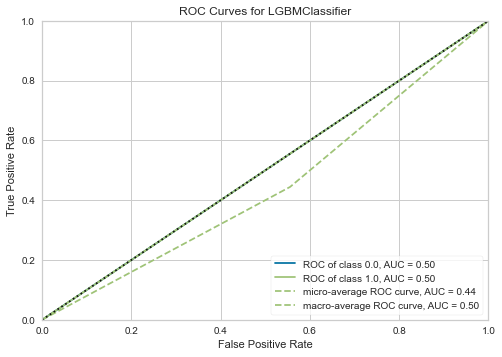

In [36]:
plot_model(FINAL_MODEL, plot = 'auc')

In [37]:
pkl_name = (today + "_" + model + "_" + pair)

In [38]:
save_model(FINAL_MODEL, pkl_name)

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=False, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[],
                                       target='Current_Market',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 nume...
                                 colsample_bytree=1.0, feature_fraction=0.9,
                                 importance_type='split', learning_rate=1e-07,
                                 max_depth=-1, min_child_samples=91,
          

In [39]:
SAVED_FINAL_MODEL = load_model(pkl_name)

Transformation Pipeline and Model Successfully Loaded


In [40]:
new_prediction = predict_model(SAVED_FINAL_MODEL, data=data_unseen)

In [41]:
data_unseen.shape

(12, 21)

In [42]:
new_prediction.head(20)

,Current_Market,Rec1_Close_Score,Rec1_High_Score,Rec1_Low_Score,Rec1_HH,Rec1_LL,Rec2_Close_Score,Rec2_High_Score,Rec2_Low_Score,Rec2_HH,...,Rec3_Low_Score,Rec3_HH,Rec3_LL,Rec4_Close_Score,Rec4_High_Score,Rec4_Low_Score,Rec4_HH,Rec4_LL,Label,Score
0,0.0,83.0,74.0,81.0,-0.0250,0.0014,83.0,74.0,81.0,-0.0030,...,81.0,-0.0021,0.0024,83.0,74.0,81.0,-0.0020,0.0022,1.0,0.5185
1,1.0,18.0,63.0,11.0,-0.0047,0.0031,18.0,63.0,11.0,-0.0049,...,11.0,-0.0025,0.0015,18.0,63.0,11.0,-0.0008,0.0091,1.0,0.5185
2,1.0,-72.0,-61.0,-56.0,-0.0017,0.0059,-72.0,-61.0,-56.0,-0.0048,...,-56.0,-0.0012,0.0035,-72.0,-61.0,-56.0,-0.0012,0.0058,1.0,0.5185
3,1.0,-36.0,-56.0,-26.0,-0.0054,0.0022,-36.0,-56.0,-26.0,-0.0109,...,-26.0,-0.0113,0.0007,-36.0,-56.0,-26.0,-0.0087,0.0026,1.0,0.5185
4,0.0,-10.0,5.0,10.0,-0.0049,0.0038,-10.0,5.0,10.0,-0.0049,...,10.0,-0.0057,0.0050,-10.0,5.0,10.0,-0.0049,0.0039,1.0,0.5185
5,1.0,-4.0,-17.0,49.0,-0.0026,0.0040,-4.0,-17.0,49.0,-0.0003,...,49.0,-0.0031,0.0095,-4.0,-17.0,49.0,-0.0065,0.0041,1.0,0.5185
6,0.0,24.0,17.0,20.0,-0.0162,0.0006,24.0,17.0,20.0,-0.0109,...,20.0,-0.0113,0.0007,24.0,17.0,20.0,-0.0058,0.0062,1.0,0.5185
7,0.0,-61.0,-81.0,-28.0,-0.0009,0.0091,-61.0,-81.0,-28.0,-0.0004,...,-28.0,-0.0007,0.0046,-61.0,-81.0,-28.0,-0.0042,0.0040,1.0,0.5185
8,0.0,-51.0,-47.0,9.0,-0.0024,0.0284,-51.0,-47.0,9.0,-0.0173,...,9.0,-0.0117,0.0154,-51.0,-47.0,9.0,-0.0087,0.0150,1.0,0.5185
9,1.0,-78.0,-70.0,-81.0,-0.0027,0.0063,-78.0,-70.0,-81.0,-0.0158,...,-81.0,-0.0029,0.0081,-78.0,-70.0,-81.0,-0.0122,0.0007,1.0,0.5185


In [43]:
file = open(today + "_" + model + "_binary_classification_log_" + pair + ".txt", "w")
file.write ("Date: " + today + "\n" + \
            "Currency Pair: " + pair + "\n" + \
            "Model: " + model + "\n" + \
            "Frac: " + str(frac) + "\n" + \
            "Random State: " + str(random_state) + "\n" )
file.close()

[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will b

[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will b

[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will b

[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will b